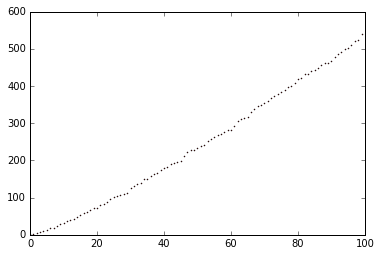

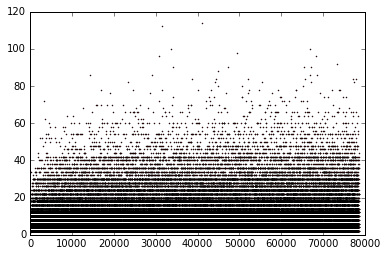

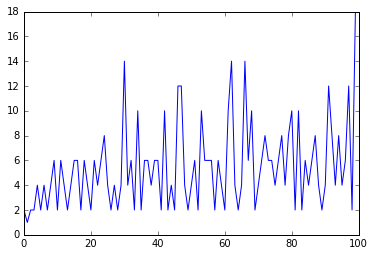

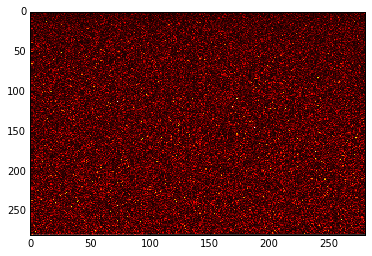

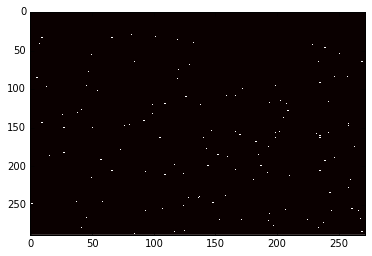

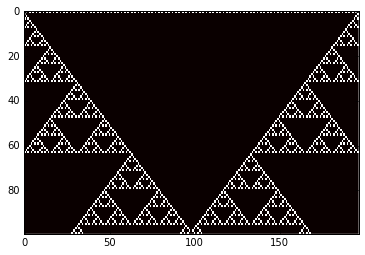

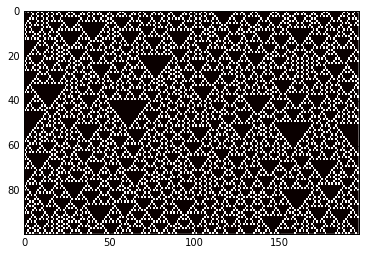

In [1]:
%reset -f

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from operator import xor

def plot_dot(arr):
    plt.plot(arr, 'ro', markersize=1)
    plt.show()

def plot_line(arr):
    plt.plot(arr)
    plt.show()

def two_d_plot(arr):
    fig1 = plt.gcf()
    ax = fig1.add_subplot(111)
    imgplot = plt.imshow(arr, interpolation='none', cmap="hot", aspect=100)
    ax.set_aspect('auto')
    plt.show()

def diff_adj(arr):
    return map(lambda (i, e): (e - get_element(arr, i-1)), enumerate(arr))

def modulo_arr(arr, n):
    return map(lambda e: e%n, arr)

def filter_arr(arr, n):
    return map(lambda x : 1 if x == n else 0, arr)

def get_element(arr, i):
    if i < 0 or i >= len(arr):
        return 0
    else:
        return arr[i]

def to_binary(arr):
    binary_arr_str = map(lambda x : '{0:020b}'.format(int(x)), arr)
    return map(lambda x : map(lambda y: int(y), list(x)), binary_arr_str)

def reshape_arr(arr, width):
    height = int(math.ceil(len(arr)/float(width)))
    fill = width*height - len(arr)
    arr_filled = arr + [0]*fill
    return np.asarray(arr_filled).reshape(width, height)

def sierpinski(arr, n):
    result = []
    result.append(arr)
    for i in range(1, n):
        result.append(xor_next(result[i-1]))
    return result

def sier_plot(arr, n):
    arrs = sierpinski(arr, n)
    two_d_plot(arrs)

def xor_next(arr):
    return map(lambda (i, e): xor(int(get_element(arr, i-1)), int(get_element(arr, i+1))), enumerate(arr))

primes = np.genfromtxt("primes")[1:]


plot_dot(primes[:100])
plot_dot(diff_adj(primes))
plot_line(diff_adj(primes[:100]))
two_d_plot(reshape_arr(diff_adj(primes), 280))
two_d_plot(reshape_arr(filter_arr(modulo_arr(diff_adj(primes), 23), 0), 289))

sier_plot(map(lambda x: 1 if x%2 == 0 else 0, range(3, 200)), 100)
sier_plot(map(lambda x: 1 if x in primes else 0, range(3, 200)), 100)
